In [ ]:
# 런타임 -> 런타임 유형변경 -> 하드웨어 가속도 TPU변경
%tensorflow_version 2.x
#런타임 -> 런타임 다시시작

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
import os
import natsort
import cv2 as cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

import tensorflow as tf
from tensorflow import shape,math
from tensorflow.keras import Input,layers,Model
from tensorflow.keras.losses import mse,binary_crossentropy
from tensorflow.keras.utils import plot_model

print(tf.__version__)

2.11.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data loading

In [ ]:
Norm_data = np.loadtxt("drive/MyDrive/Hail_yeongmin/data/CCD_feature/normal_X3D.csv",  delimiter=',')
Anorm_data = np.loadtxt("drive/MyDrive/Hail_yeongmin/data/CCD_feature/crash_X3D.csv", delimiter=',')
Norm_data2 = np.loadtxt("drive/MyDrive/Hail_yeongmin/data/CCD_feature/DEC_compress_X3D.csv",  delimiter=',')

In [ ]:
print('Normal_DEC: ', len(Norm_data2))
print('Normal_CCD: ',len(Norm_data))
print('Crash: ',len(Anorm_data))

Normal_DEC:  3129
Normal_CCD:  9000
Crash:  2025


### Train/Test data making

Normal = 0
Anormal = 1

In [ ]:
# Train data생성
X,Y = [],[]
train_label = []
for i in range(len(Norm_data)):
  X.append(Norm_data[i])
  Y.append(0) # normal label: 0
x_train = np.array(X)
y_train = Y

# Test_0생성
X_0, Y_0 = [], []
for i in range(2129, 3129):
  X_0.append(Norm_data[i])
  Y_0.append(0) # normal label: 0
x_train0 = np.array(X_0)
y_train0 = Y_0

# Test data생성
X_test, Y_test = [], []
test_label = []
for i in range(0, 2700):
  X_test.append(Norm_data2[i])
  Y_test.append(0)
  #test_label.append(Norm_data_label[i])

for i in range(0, 300):
  X_test.append(Anorm_data[i])
  Y_test.append(1)
  #test_label.append(Anorm_data_label[i])
x_test = np.array(X_test)
y_test = Y_test

In [ ]:
print("Datasets_train_shape: ", x_train.shape)
print("Datasets_test_shape: ", x_test.shape)

Datasets_train_shape:  (9000, 2048)
Datasets_test_shape:  (3000, 2048)


In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split

print(tf.__version__)     # 텐서플로우 버전확인 (colab의 기본버전은 1.15.0) --> 2.0 변경 "%tensorflow_version 2.x"
print(keras.__version__)

2.11.0
2.11.0


In [ ]:
def AE():
    ## Encoder 구간
    model = tf.keras.Sequential()
    model.add(Dense(1024, input_shape=(2048,)))  # Input layer + Hidden layer1
    model.add(Activation('relu'))

    model.add(Dense(512))                       # Hidden layer2
    model.add(Activation('relu')) 

    model.add(Dense(256))                       # Hidden layer3
    model.add(Activation('relu'))      

    model.add(Dense(128))                       # Hidden layer4
    model.add(Activation('relu'))

    model.add(Dense(64))
    model.add(Activation('relu'))               # Hidden layer5

    model.add(Dense(3))                         # Hidden layer6
    model.add(Activation('relu'))

    ## Decoder 구간
    model.add(Dense(3))                        # Hidden layer6
    model.add(Activation('relu'))

    model.add(Dense(3))                         # Hidden layer5
    model.add(Activation('relu'))

    model.add(Dense(128))                      # Hidden layer4
    model.add(Activation('relu'))

    model.add(Dense(256))                       # Hidden layer3
    model.add(Activation('relu'))

    model.add(Dense(512))                       # Hidden layer2
    model.add(Activation('relu'))

    model.add(Dense(1024))                       # Hidden layer1
    model.add(Activation('relu'))

    model.add(Dense(2048))                # Output layer1
    model.add(Activation('softmax'))

    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

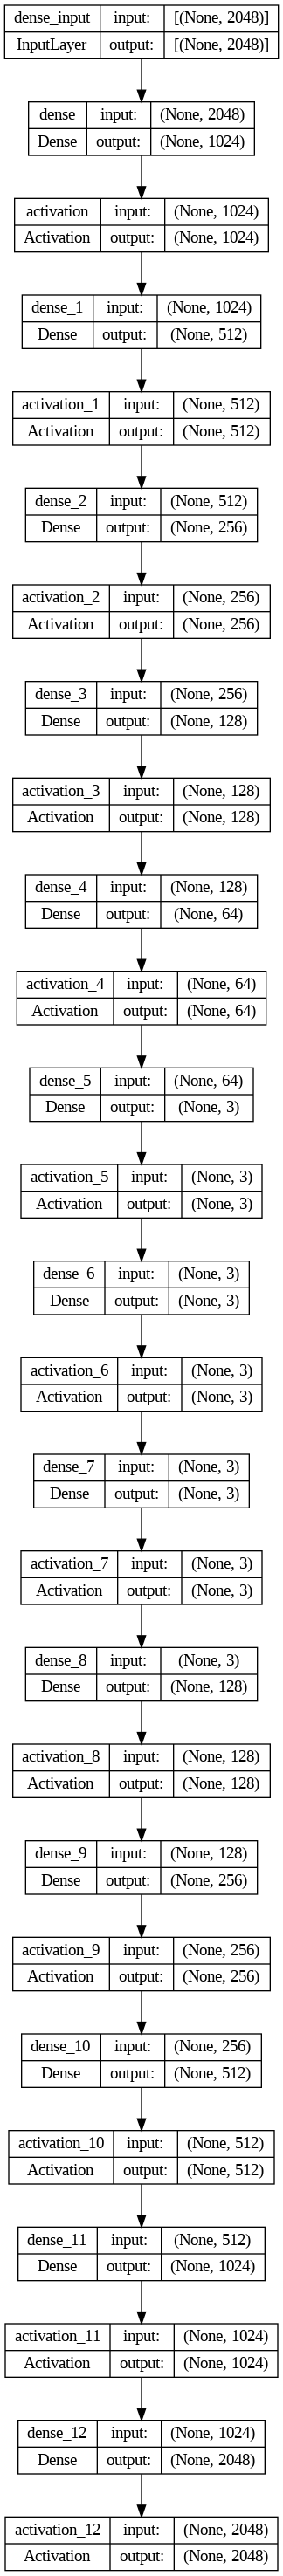

In [ ]:
model = AE()
model.summary()
# 위에서 정한 모델을 그림으로(plot) 보여줌
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

## Model Training

In [ ]:

# 모델 구조 확정하고 컴파일 진행
model.compile(loss='MSE',                   # MSE : mean square error
              optimizer='adam',                 
              metrics=[ 'mae' ])            # MAE : mean absolute  error


# model.fit을 써서 학습. 학습과정을 history에 저장
history = model.fit(x_train, x_train,
                    batch_size=100,
                    epochs=30,
                    validation_data=(x_test, x_test),
                    shuffle=True)

Epoch 1/30
90/90 [==============================] - 11s 100ms/step - loss: 0.0308 - mae: 0.1406 - val_loss: 0.0108 - val_mae: 0.0773
Epoch 2/30
90/90 [==============================] - 8s 89ms/step - loss: 0.0308 - mae: 0.1406 - val_loss: 0.0108 - val_mae: 0.0773
Epoch 3/30
90/90 [==============================] - 8s 89ms/step - loss: 0.0308 - mae: 0.1406 - val_loss: 0.0108 - val_mae: 0.0773
Epoch 4/30
90/90 [==============================] - 8s 94ms/step - loss: 0.0308 - mae: 0.1406 - val_loss: 0.0108 - val_mae: 0.0773
Epoch 5/30
90/90 [==============================] - 7s 83ms/step - loss: 0.0308 - mae: 0.1406 - val_loss: 0.0108 - val_mae: 0.0773
Epoch 6/30
90/90 [==============================] - 8s 93ms/step - loss: 0.0308 - mae: 0.1406 - val_loss: 0.0108 - val_mae: 0.0773
Epoch 7/30
90/90 [==============================] - 8s 92ms/step - loss: 0.0308 - mae: 0.1406 - val_loss: 0.0108 - val_mae: 0.0773
Epoch 8/30
90/90 [==============================] - 7s 82ms/step - loss: 0.0308 -

## Learning curve

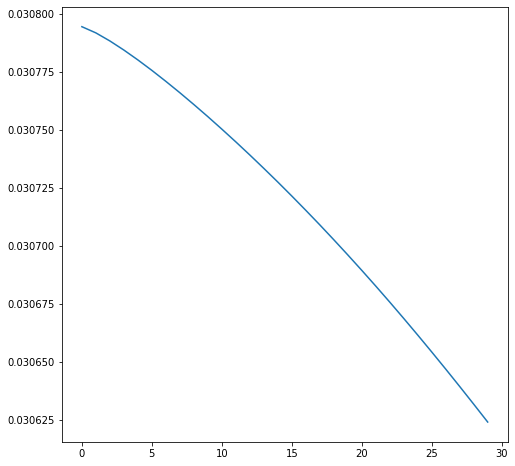

In [ ]:
loss = history.history['loss']
plt.figure(figsize=(8, 8))
plt.plot(loss, label = 'Training Losss')
plt.show()

## MSE function

In [ ]:
def MSE(p, q):
  return np.mean((p - q)**2)

In [ ]:
test_score = model.evaluate(x_train0, x_train0, verbose=0)
prediction = model.predict(x_train0)

32/32 [==============================] - 0s 10ms/step


## test dataset을 활용하여 MSE 값 측정 + IQR

In [ ]:
MSE_loss = []
for i in range(len(x_train0)):
  MSE_loss.append(MSE(x_train0[i], prediction[i]))


print("MSE mean: ", np.mean(MSE_loss))
print("MSE variance: ", np.var(MSE_loss))
print("MSE standard deviation: ", np.std(MSE_loss))
mean_mse = np.mean(MSE_loss)
mean_lower_mse, mean_upper_mse = mean_mse - np.std(MSE_loss), mean_mse + np.std(MSE_loss)
print("mean_lower: ", mean_lower_mse)
print("mean_upper: ", mean_upper_mse)
print("MSE min: ", np.min(MSE_loss))
print("\n")

# IQR 계산
q25_mse = np.quantile(MSE_loss, 0.25)
q75_mse = np.quantile(MSE_loss, 0.75)
iqr_mse = q75_mse - q25_mse

cut_off_mse = iqr_mse*1.5
lower_mse, upper_mse = q25_mse - cut_off_mse, q75_mse + cut_off_mse
print("IQR: ", iqr_mse)
print("Lower: ", lower_mse)
print("Upper: ", upper_mse)
print("\n")                            

MSE mean:  0.030636019012018137
MSE variance:  4.352824842749889e-06
MSE standard deviation:  0.0020863424557703582
mean_lower:  0.02854967655624778
mean_upper:  0.032722361467788494
MSE min:  0.0222111906133472


IQR:  0.002449945974877247
Lower:  0.02591706002426107
Upper:  0.03571684392377006




## Loss function: MSE

In [ ]:
outlier_score = model.evaluate(x_test, x_test, verbose=0) # loss 값 결과 확인

sample_size = len(x_test)                     # 보여줄 sample 갯수 설정
prediction3 = model.predict(x_test)      # test 데이터로 이미지 복원(predict 함수 사용)

# Dataframe에 저장할 list생성
Result = []

# mixed dataset내 각각의 data point마다 KLD loss를 구한다
MSE_data = []
for i in range(sample_size):
  MSE_data.append(MSE(x_test[i], prediction3[i]))

# 위에서 구한 KLD mean의 lower, upper에 따라 outlier detection 수행
for i in range(sample_size):
  if MSE_data[i] < mean_upper_mse and MSE_data[i] > mean_lower_mse:
    Result.append(0)
  else:
    Result.append(1)

# Confusion matrix
y_true = y_test
y_pred = Result
confusion_matrix(y_true, y_pred, labels=[1,0])

# 분류 성능 평가
print("Acc: ", accuracy_score(y_true, y_pred))
print("Precision: ", precision_score(y_true, y_pred, pos_label=1))
print("Recall: ", recall_score(y_true, y_pred, pos_label=1))
print("F1 score: ", f1_score(y_true, y_pred, pos_label=1))

# ROC
fpr, tpr, thresholds = roc_curve(y_true, MSE_data, pos_label=1)
#fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
roc_score = roc_auc_score(y_true, MSE_data)


print("AUROC: ", auc(fpr, tpr))
print("AUPRC: ", average_precision_score(y_true, y_pred))
print("\n")

count_TP, count_TN, count_FN, count_FP = 0, 0, 0, 0
for i in range(len(y_pred)):
  if y_true[i] == 1 and y_pred[i] == 1:
    count_TP += 1
  elif y_true[i] == 1 and y_pred[i] == 0:
    count_FN += 1
  elif y_true[i] == 0 and y_pred[i] == 0:
    count_TN += 1
  else:
    count_FP += 1

print("사고를 사고로 예측(TP): ", count_TP)
print("사고를 정상으로 예측(FN): ", count_FN)
print("정상을 정상으로 예측(TN): ", count_TN)
print("정상을 사고로 예측(FP): ", count_FP)

94/94 [==============================] - 1s 11ms/step
Acc:  0.052
Precision:  0.052742616033755275
Recall:  0.5
F1 score:  0.09541984732824427
AUROC:  0.9798740740740741
AUPRC:  0.07637130801687764


사고를 사고로 예측(TP):  150
사고를 정상으로 예측(FN):  150
정상을 정상으로 예측(TN):  6
정상을 사고로 예측(FP):  2694


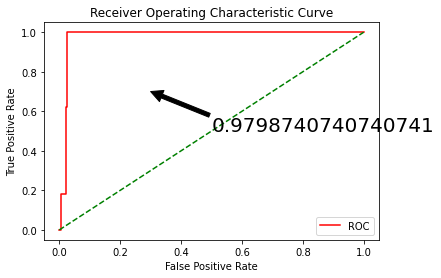

In [ ]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    arrowprop = dict(color = 'violet', arrowstyle="-|>")
    plt.annotate(roc_score, xy=(0.3, 0.7), xytext=(0.5, 0.5), arrowprops=dict(facecolor='black'), fontsize = 20)
    plt.legend()
    plt.show()
    

plot_roc_curve(fpr, tpr)

## Loss function: MSE + IQR

In [ ]:
outlier_score = model.evaluate(x_test, x_test, verbose=0) # loss 값 결과 확인

sample_size = len(x_test)                     # 보여줄 sample 갯수 설정
prediction3 = model.predict(x_test)      # test 데이터로 이미지 복원(predict 함수 사용)

# Dataframe에 저장할 list생성
Result = []

# mixed dataset내 각각의 data point마다 KLD loss를 구한다
MSE_data = []
for i in range(sample_size):

  MSE_data.append(MSE(x_test[i], prediction3[i]))

# 위에서 구한 KLD mean의 lower, upper에 따라 outlier detection 수행
for i in range(sample_size):
  if MSE_data[i] < upper_mse and MSE_data[i] > lower_mse:
    Result.append(1)
  else:
    Result.append(0)

#print("--------------------------------------------------------\n")

# Confusion matrix
y_true = y_test
y_pred = Result
confusion_matrix(y_true, y_pred, labels=[1,0])

# 분류 성능 평가
print("Acc: ", accuracy_score(y_true, y_pred))
print("Precision: ", precision_score(y_true, y_pred, pos_label=1))
print("Recall: ", recall_score(y_true, y_pred, pos_label=1))
print("F1 score: ", f1_score(y_true, y_pred, pos_label=1))

# ROC
fpr, tpr, thresholds = roc_curve(y_true, MSE_data, pos_label=1)
#fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
roc_score = roc_auc_score(y_true, MSE_data)


print("AUROC: ", auc(fpr, tpr))
print("AUPRC: ", average_precision_score(y_true, y_pred))
print("\n")

count_TP, count_TN, count_FN, count_FP = 0, 0, 0, 0
for i in range(len(y_pred)):
  if y_true[i] == 1 and y_pred[i] == 1:
    count_TP += 1
  elif y_true[i] == 1 and y_pred[i] == 0:
    count_FN += 1
  elif y_true[i] == 0 and y_pred[i] == 0:
    count_TN += 1
  else:
    count_FP += 1

print("정상을 정상으로 예측: ", count_TP)
print("정상을 사고로 예측: ", count_FN)
print("사고를 사고로 예측: ", count_TN)
print("사고를 정상으로 예측: ", count_FP)

94/94 [==============================] - 1s 11ms/step
Acc:  0.98
Precision:  0.8333333333333334
Recall:  1.0
F1 score:  0.9090909090909091
AUROC:  0.9798740740740741
AUPRC:  0.8333333333333334


정상을 정상으로 예측:  300
정상을 사고로 예측:  0
사고를 사고로 예측:  2640
사고를 정상으로 예측:  60


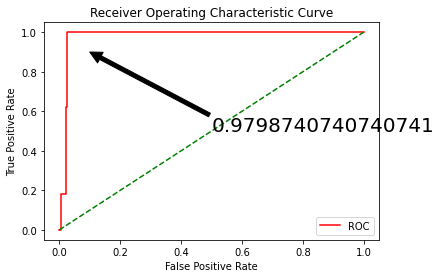

In [ ]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    arrowprop = dict(color = 'violet', arrowstyle="-|>")
    plt.annotate(roc_score, xy=(0.1, 0.9), xytext=(0.5, 0.5), arrowprops=dict(facecolor='black'), fontsize = 20)
    plt.legend()
    plt.show()
    

plot_roc_curve(fpr, tpr)

375/375 [==============================] - 5s 12ms/step
Normal Metric
         Normal_mse
count  12000.000000
mean       0.025658
std        0.009807
min        0.001553
25%        0.026419
50%        0.030173
75%        0.031851
max        0.038375


94/94 [==============================] - 1s 10ms/step
Anomaly Metric
       Anomaly_mse
count  3000.000000
mean      0.010773
std       0.008706
min       0.001553
25%       0.005581
50%       0.008045
75%       0.011928
max       0.038375




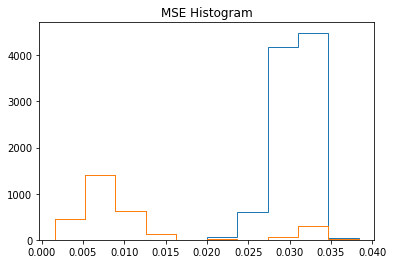

In [ ]:
import pandas as pd # pandas 라이브러리

# Normal data (data_3000)
Nom_data = np.concatenate((x_test, x_train), axis = 0)
Nom_pred = model.predict(Nom_data) # AE 이미지 결과값 
Nom_pred_mse = np.mean(np.power(Nom_data - Nom_pred, 2), axis=1) # input - output 이미지간의 MSE 구하기

# 기초통계학 평균, 분산, 최소값, 최대값, 25%, 50%, 75% 분포 구하는 방법
print('Normal Metric')
Nom_pred_mse_df = pd.DataFrame({'Normal_mse':Nom_pred_mse})
print(Nom_pred_mse_df.describe())

print('\n')

# Abnormal data (data_1000)
ANom_pred = model.predict(x_test) # AE 이미지 결과값 
ANom_pred_mse = np.mean(np.power(x_test - ANom_pred, 2), axis=1) # input - output 이미지간의 MSE 구하기

# 기초통계학 평균, 분산, 최소값, 최대값, 25%, 50%, 75% 분포 구하는 방법
print('Anomaly Metric')
ANom_pred_mse_df = pd.DataFrame({'Anomaly_mse':ANom_pred_mse})
print(ANom_pred_mse_df.describe())

# 히스토그램 그리기
print('\n')
plt.figure()
plt.title('MSE Histogram') # 그림 이름 설정 
plt.hist(Nom_pred_mse, bins=10, facecolor='blue', histtype='step') #히스토그램 함수, bins:데이터를 범주화 하는 기준
plt.hist(ANom_pred_mse, bins=10, facecolor='red', histtype='step') #히스토그램 함수, bins:데이터를 범주화 하는 기준
plt.show()